In [1]:
#Based off of: https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
#This is really comprehensive and the analysis was simply beautiful
#Hopefully I'll be able to gain some insights on my dataet using this.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#somehow I was not able to get seaborn installed in my tensorflow env, so 
#the non tensorflow env had to bail me out
#here in lies the advantage of multiple envs.
%matplotlib inline

plt.style.use('bmh')

In [73]:
!echo %cd% 

C:\Users\kmoudgalya\AnacondaProjects 


In [33]:
#the "r" after the "(" is the magic elixir that helps avoid UTF problems.
df = pd.read_excel(r"C:\ML Hackathon\pandas_output2.xlsx")
df = df.drop(columns = ["State_x","County_x"])
df.head()

FIPS  Population, low access to store, 2010  \
2105  39127                            3713.640840   
335   12035                           33564.747365   
561   16023                             605.164533   
358   12081                           74391.881668   
1145  22067                            6896.431864   

      Population, low access to store, 2015  \
2105                            1410.531617   
335                            33041.245469   
561                              618.473210   
358                            70204.895488   
1145                            6826.518316   

      Low income & low access to store, 2010  \
2105                             1898.685754   
335                              9805.739747   
561                               267.297015   
358                             18524.575189   
1145                             3895.543014   

      Low income & low access to store, 2015  \
2105                              847.224107   
335                             12181.425241   
561                               307.711414   
358                             20564.984354   
1145                             4231.922584   

      Households, no car & low access to store, 2010  \
2105                                      790.543946   
335                                       861.286373   
561                                         6.680208   
358                                      1306.101746   
1145                                      687.008404   

      Households, no car & low access to store, 2015  \
2105                                      603.868779   
335                                       913.009272   
561                                         9.092895   
358                                      1547.709725   
1145                                      726.285267   

      SNAP households, low access to store, 2015  \
2105                                  168.620514   
335                                  1255.111943   
561                                    28.709604   
358                                  2335.402236   
1145                                  628.112358   

      Children, low access to store, 2010  \
2105                          1094.142002   
335                           6983.983143   
561                            199.206240   
358                          12245.034104   
1145                          1723.974298   

      Children, low access to store, 2015            ...              \
2105                           420.357841            ...               
335                           6912.412843            ...               
561                            202.391428            ...               
358                          11756.424482            ...               
1145                          1650.583590            ...               

      Persistent-child-poverty counties, 2010  Metro/nonmetro counties, 2010  \
2105                                        0                              0   
335                                         1                              1   
561                                         0                              0   
358                                         1                              0   
1145                                        1                              0   

      Population-loss counties, 2010  2010 Census Population  \
2105                             1.0                   36058   
335                              0.0                   95696   
561                              0.0                    2891   
358                              0.0                  322833   
1145                             0.0                   27979   

      Population Estimate, 2011  Population Estimate, 2012  \
2105                      36207                      35991   
335                       97412                      98605   
561                        2805                       2722   
358             

In [3]:
print(df.isnull().sum())

FIPS                                                              0
Population, low access to store, 2010                             0
Population, low access to store, 2015                            19
Low income & low access to store, 2010                            0
Low income & low access to store, 2015                           20
Households, no car & low access to store, 2010                    0
Households, no car & low access to store, 2015                    3
SNAP households, low access to store, 2015                       20
Children, low access to store, 2010                               0
Children, low access to store, 2015                              19
Seniors, low access to store, 2010                                0
Seniors, low access to store, 2015                               19
White, low access to store, 2015                                 19
Black, low access to store, 2015                                 19
Hispanic ethnicity, low access to store, 2015   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 2105 to 2016
Columns: 162 entries, FIPS to Population Estimate, 2016
dtypes: float64(126), int64(36)
memory usage: 3.9 MB


In [34]:
#dropping features which have more than 30% NaNs
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
print ("List of dropped columns for 30% NaNs:",end = " ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=" ")
print("\n")
#somehow this is not dropping Agritourism, 2007 when it actually should. WEIRD.

df = df2
df3 = df[df.columns.drop(list(df.filter(regex='2014')))]
df3 = df3[df3.columns.drop(list(df3.filter(regex='2015')))]
df3 = df3[df3.columns.drop(list(df3.filter(regex='2016')))]
print("List of dropped columns for being beyond or equal to target year:")
for c in df.columns:
    if c not in df3.columns:
        print(c, end="\n")
print("\n")

List of dropped columns for 30% NaNs: 

List of dropped columns for being beyond or equal to target year:
Population, low access to store, 2015
Low income & low access to store, 2015
Households, no car & low access to store, 2015
SNAP households, low access to store, 2015
Children, low access to store, 2015
Seniors, low access to store, 2015
White, low access to store, 2015
Black, low access to store, 2015
Hispanic ethnicity, low access to store, 2015
Asian, low access to store, 2015
American Indian or Alaska Native, low access to store, 2015
Hawaiian or Pacific Islander, low access to store, 2015
Multiracial, low access to store, 2015
Grocery stores, 2014
Grocery stores/1,000 pop, 2014
Supercenters & club stores, 2014
Supercenters & club stores/1,000 pop, 2014
Convenience stores, 2014
Convenience stores/1,000 pop, 2014
Specialized food stores, 2014
Specialized food stores/1,000 pop, 2014
SNAP-authorized stores, 2016
SNAP-authorized stores/1,000 pop, 2016
Fast-food restaurants, 2014
Fa

In [35]:
df = df3
list(df)

['FIPS',
 'Population, low access to store, 2010',
 'Low income & low access to store, 2010',
 'Households, no car & low access to store, 2010',
 'Children, low access to store, 2010',
 'Seniors, low access to store, 2010',
 'Grocery stores, 2009',
 'Grocery stores/1,000 pop, 2009',
 'Supercenters & club stores, 2009',
 'Supercenters & club stores/1,000 pop, 2009',
 'Convenience stores, 2009',
 'Convenience stores/1,000 pop, 2009',
 'Specialized food stores, 2009',
 'Specialized food stores/1,000 pop, 2009',
 'SNAP-authorized stores, 2012',
 'SNAP-authorized stores/1,000 pop, 2012',
 'WIC-authorized stores, 2008',
 'WIC-authorized stores, 2012',
 'WIC-authorized stores/1,000 pop, 2008',
 'WIC-authorized stores/1,000 pop, 2012',
 'Fast-food restaurants, 2009',
 'Fast-food restaurants/1,000 pop, 2009',
 'Full-service restaurants, 2009',
 'Full-service restaurants/1,000 pop, 2009',
 'Expenditures per capita, fast food, 2007*',
 'Expenditures per capita, fast food, 2012*',
 'Expenditures p

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 2105 to 2016
Columns: 104 entries, FIPS to Population Estimate, 2013
dtypes: float64(83), int64(21)
memory usage: 2.5 MB


In [36]:
df_x = pd.read_excel(r"C:\ML Hackathon\Data_Download_with_defined_target.xls", sheet_name = "STORES")
df_x = df_x[["FIPS","TARGET","Grocery stores, 2014"]]
df = pd.merge(df,df_x,on="FIPS")
df

FIPS  Population, low access to store, 2010  \
0     39127                            3713.640840   
1     12035                           33564.747365   
2     16023                             605.164533   
3     12081                           74391.881668   
4     22067                            6896.431864   
5      5031                           24129.965162   
6      1053                            5188.706191   
7     20093                             350.213727   
8     51013                            5136.184060   
9     42007                           67604.925063   
10    19021                            2738.827615   
11    16073                            2056.337099   
12    17197                          242455.252478   
13    54093                              74.186764   
14    22113                            3425.894350   
15    24023                            1294.428666   
16    32007                           11097.091084   
17    40073                            2273.643219   
18    48369                            1384.846203   
19    48311                             692.861567   
20    28045                           19685.624349   
21    19019                            2754.206725   
22     6091                            2855.023103   
23    41067                           70499.471920   
24    13187                             369.651192   
25    27161                            5686.913873   
26     1005                            5722.305602   
27    21111                          131566.316373   
28    48201                          886068.668386   
29    48489                             894.727926   
...     ...                                    ...   
3113  47175                              98.012924   
3114  19111                            4919.817292   
3115  16011                            9351.751607   
3116  31101                            1843.198095   
3117  17185                            1006.757797   
3118  30039                            1957.509309   
3119  50007                           31125.802607   
3120  18069                            7638.158415   
3121  26073                            5721.565859   
3122  38063                            3125.999993   
3123  21027                            1961.618828   
3124  40035                            2597.002975   
3125  31185                            3569.564528   
3126  22015                           29629.757174   
3127  55035                           26548.945007   
3128  18121                            1605.425198   
3129  42089                           50921.538488   
3130  35007                            7046.763464   
3131  21201                            1705.338039   
3132  34013                           68649.951470   
3133  13159                             916.431892   
3134  47075                            3041.491805   
3135   5129                            2725.718432   
3136  37137                             651.566458   
3137  16049                            5583.991627   
3138  12127                          150118.321800   
3139  20161                           35861.649365   
3140  39105                            4990.542475   
3141  39113                          158183.232590   
3142  38055                            4944.006611   

      Low income & low access to store, 2010  \
0                                1898.685754   
1                                9805.739747   
2                                 267.297015   
3                               18524.575189   
4                                3895.543014   
5                                9933.312583   
6                                2903.320779   
7                                 106.814050   
8                                 174.962518   
9                               21133.657431   
10                                789.282204   
11                                835.256118   
12                              39

            TARGET
count  3143.000000
mean      0.406618
std       0.491281
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
the following graph is simply ridiculous...


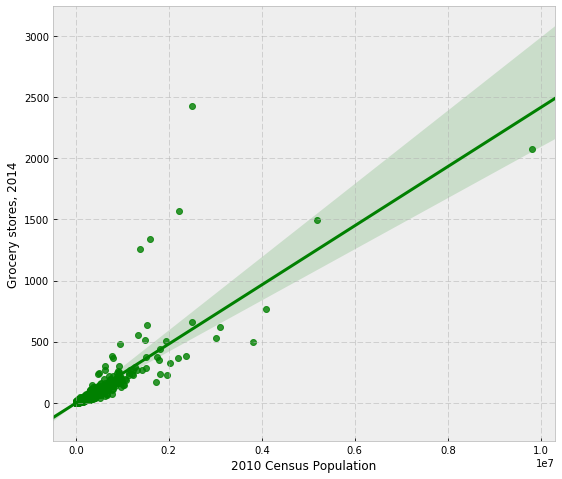

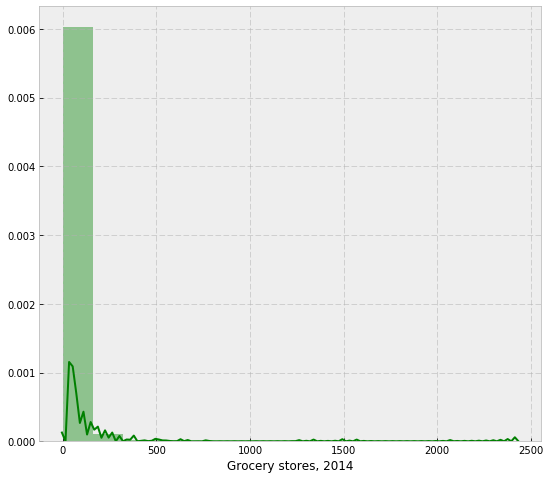

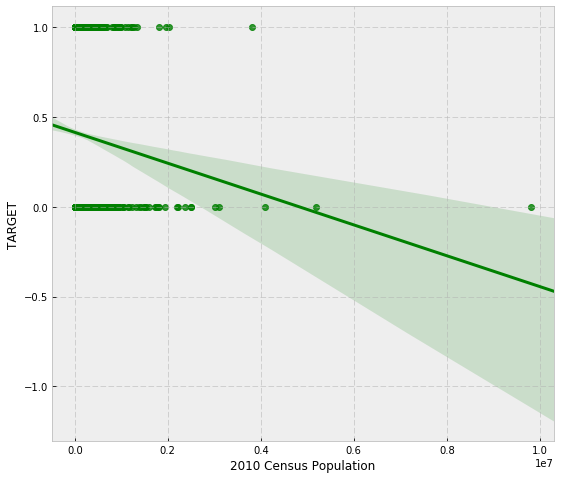

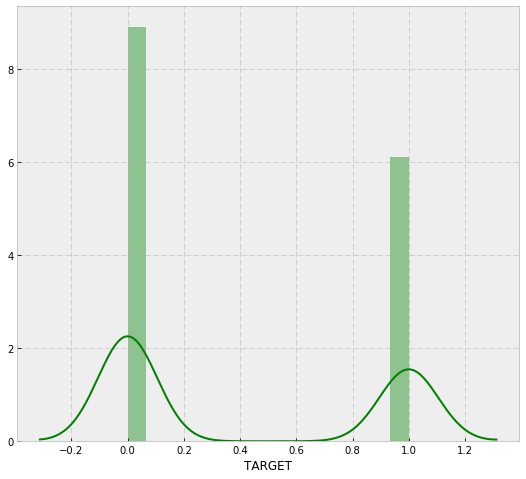

In [11]:
#plotting the distribution of grocery stores, the second graph has the distribution
#in the first one, I just wanted to see what the curve looks like for grocery stores vs population.
print(df[["TARGET"]].describe())
plt.figure(figsize=(9,8))
sns.regplot(x = df["2010 Census Population"], y = df["Grocery stores, 2014"], color = 'g', fit_reg = "False")
plt.figure(figsize=(9,8))
sns.distplot(df["Grocery stores, 2014"], color = "g", bins = 15, hist_kws = {'alpha' : 0.4})

print("the following graph is simply ridiculous...")
plt.figure(figsize=(9,8))
sns.regplot(x = df["2010 Census Population"], y = df["TARGET"], color = 'g', fit_reg = "False")
plt.figure(figsize=(9,8))
sns.distplot(df["TARGET"], color = "g", bins = 15, hist_kws = {'alpha' : 0.4})


In [12]:
plt.close()
plt.close()
plt.close()
plt.close()
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64')]

In [13]:
#df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num = df.iloc[:,1:-2]
df_num.head()

Population, low access to store, 2010  \
0                            3713.640840   
1                           33564.747365   
2                             605.164533   
3                           74391.881668   
4                            6896.431864   

   Low income & low access to store, 2010  \
0                             1898.685754   
1                             9805.739747   
2                              267.297015   
3                            18524.575189   
4                             3895.543014   

   Households, no car & low access to store, 2010  \
0                                      790.543946   
1                                      861.286373   
2                                        6.680208   
3                                     1306.101746   
4                                      687.008404   

   Children, low access to store, 2010  Seniors, low access to store, 2010  \
0                          1094.142002                          456.217887   
1                          6983.983143                         8236.167390   
2                           199.206240                           74.483135   
3                         12245.034104                        21417.001485   
4                          1723.974298                         1035.606703   

   Grocery stores, 2009  Grocery stores/1,000 pop, 2009  \
0                     8                        0.222247   
1                    14                        0.147835   
2                     1                        0.352734   
3                    60                        0.187084   
4                     4                        0.142111   

   Supercenters & club stores, 2009  \
0                                 0   
1                                 1   
2                                 0   
3                                 7   
4                                 1   

   Supercenters & club stores/1,000 pop, 2009  Convenience stores, 2009  \
0                                    0.000000                        15   
1                                    0.010560                        26   
2                                    0.000000                         5   
3                                    0.021826                       120   
4                                    0.035528                        19   

             ...              Recreation & fitness facilities, 2009  \
0            ...                                                  2   
1            ...                                                 22   
2            ...                                                  3   
3            ...                                                  4   
4            ...                                                  0   

   Recreation & fitness facilities/1,000 pop, 2009  \
0                                         0.101735   
1                                         0.074070   
2                                         0.277290   
3                                         0.206943   
4                                         0.000000   

   Persistent-poverty counties, 2010  Persistent-child-poverty counties, 2010  \
0                                  0                                        0   
1                                  0                                        1   
2                                  0                                        0   
3                                  1                                        1   
4                                  1                                        1   

   Metro/nonmetro counties, 2010  Population-loss counties, 2010  \
0                              0                             1.0   
1                              1                             0.0   
2                              0                             0.0   
3                              0                             0.0   
4                              0                           

In [14]:
#df_num.hist(figsize=(320,400), bins = 25, xlabelsize=12, ylabelsize=12)
#Gotta exclude FIPS
#Gotta exclude "TARGET" and "Grocery stores, 2014"
from math import floor as floor
print("number of columns in df without 'FIPS', 'TARGET' and 'Grocery stores, 2014': ")
print(str(len(list(df))-3))
df_num1 = df.iloc[:,1:floor((len(list(df))-3)/2)]
df_num2 = df.iloc[:,floor((len(list(df))-3)/2):-2]
print("number of columns in df_num1: ")
print(len(list(df_num1)))
print("number of columns in df_num2: ")
print(len(list(df_num2)))

number of columns in df without 'FIPS', 'TARGET' and 'Grocery stores, 2014': 
103
number of columns in df_num1: 
50
number of columns in df_num2: 
53


In [15]:
#separating into two dataframes for better vsisbility:
#df_num1 = df.iloc[:,1:(len(list(df))-3)/2]
#df_num2 = df.iloc[:,(len(list(df))-3)/2:-2]
print(df_num1.shape)
print(df_num2.shape)

(3143, 50)
(3143, 53)


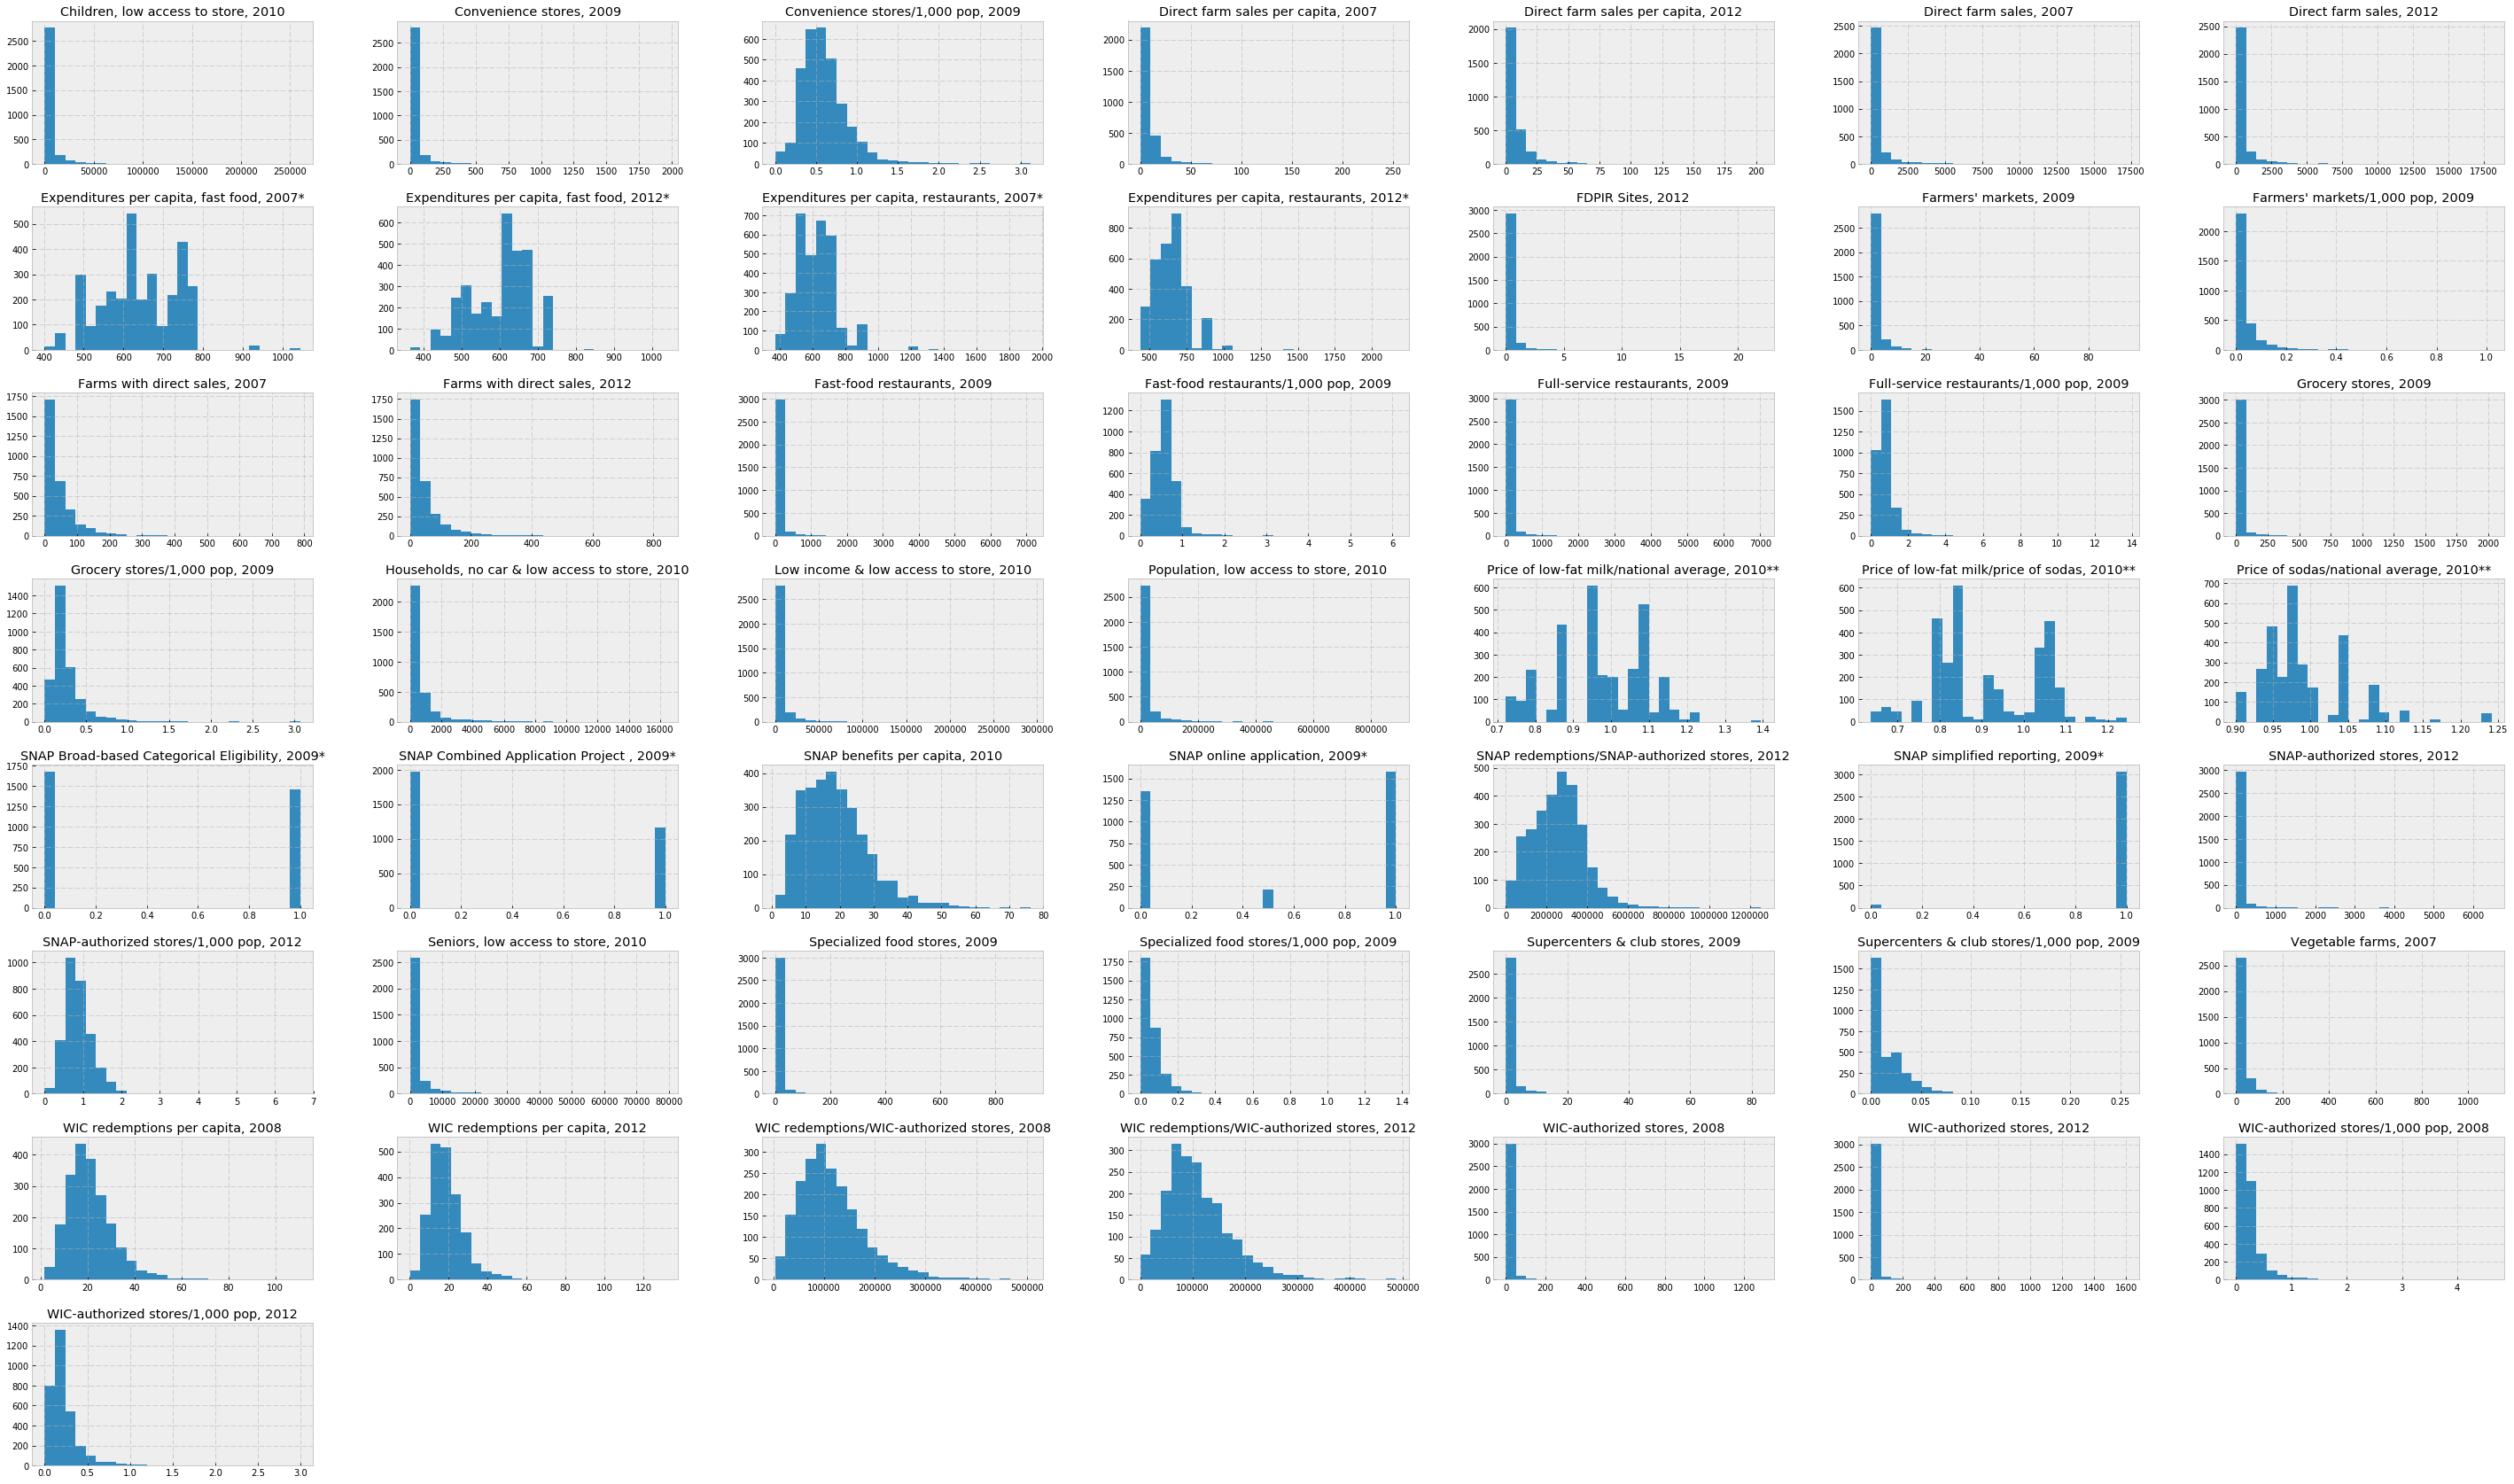

In [19]:
#the first half
fig = df_num1.hist(figsize=(50,30), bins=25)
#SOMETIME YOU'LL NEED THE BELOW PIECE OF CODE, SOMETIMES YOU WONT
#IT WILL BE FIXED IN A LATER VERSION OF MATPLOTLIB:
#https://github.com/pandas-dev/pandas/issues/9351
#plt.tight_layout()
#plt.show()

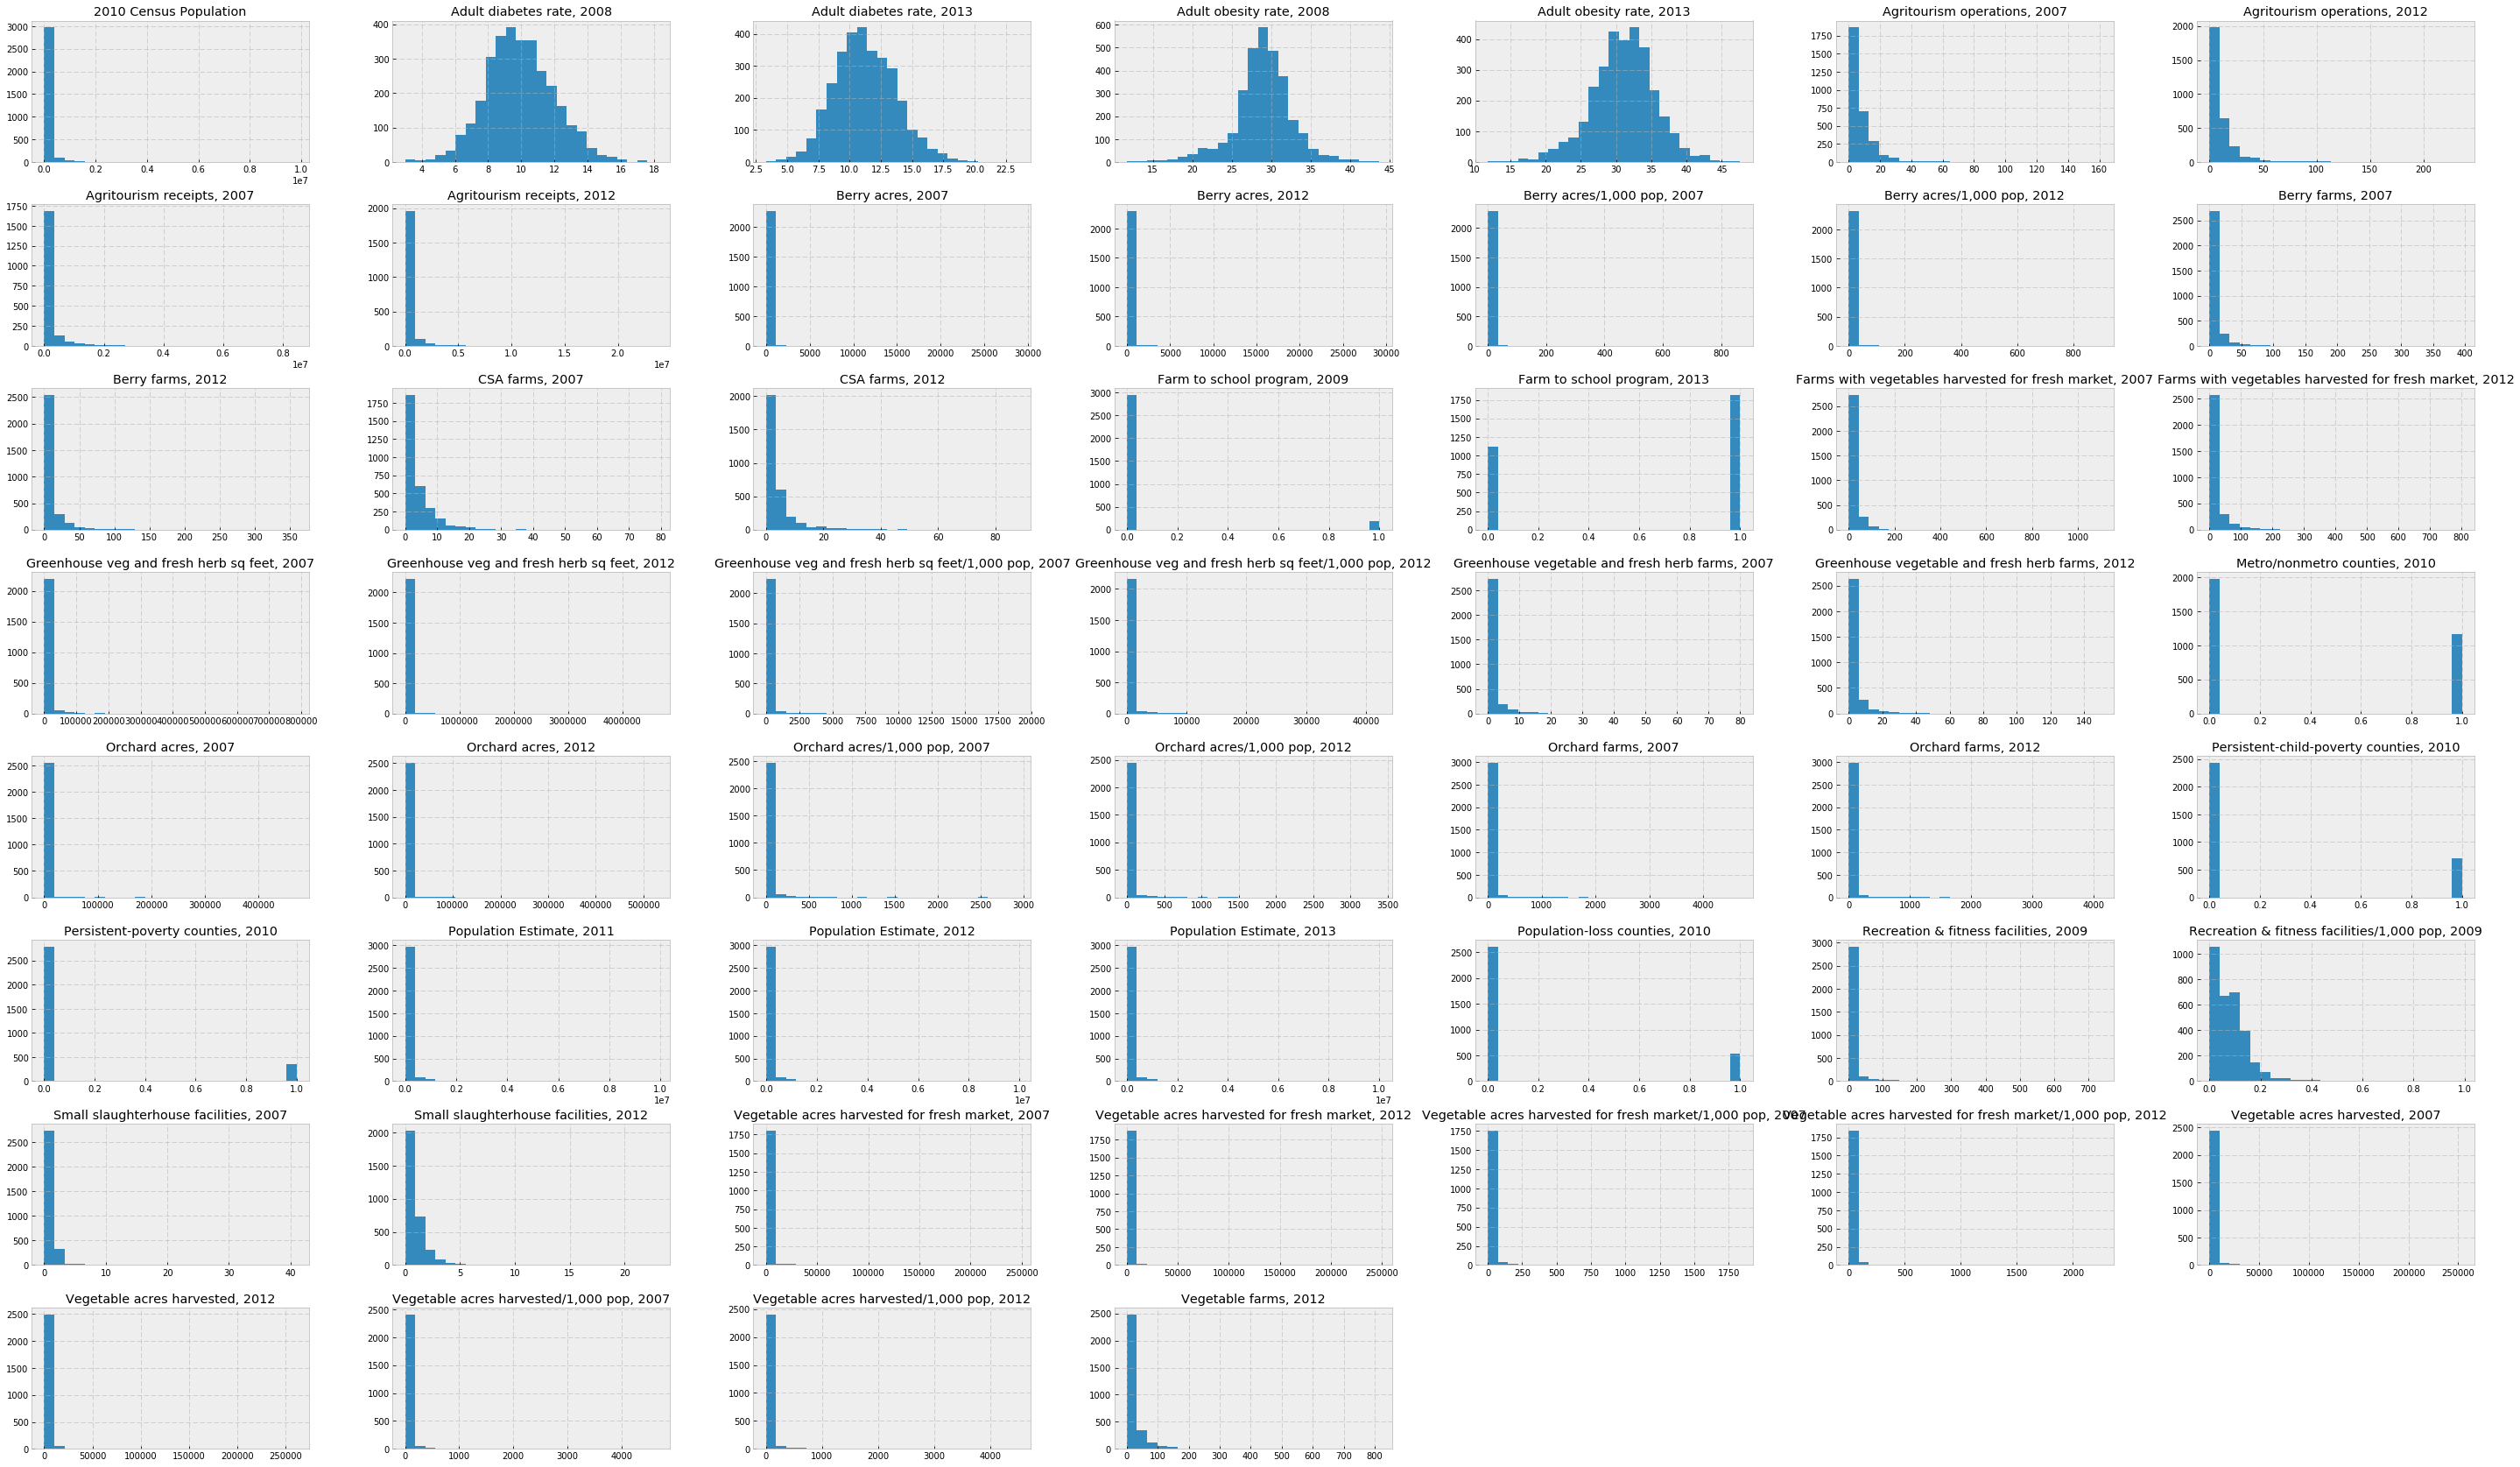

In [20]:
#the other half? dare i say, the better half?
fig = df_num2.hist(figsize=(50,30), bins = 25)
#SOMETIME YOU'LL NEED THE BELOW PIECE OF CODE, SOMETIMES YOU WONT
#IT WILL BE FIXED IN A LATER VERSION OF MATPLOTLIB:
#https://github.com/pandas-dev/pandas/issues/9351
#plt.tight_layout()
#plt.show()

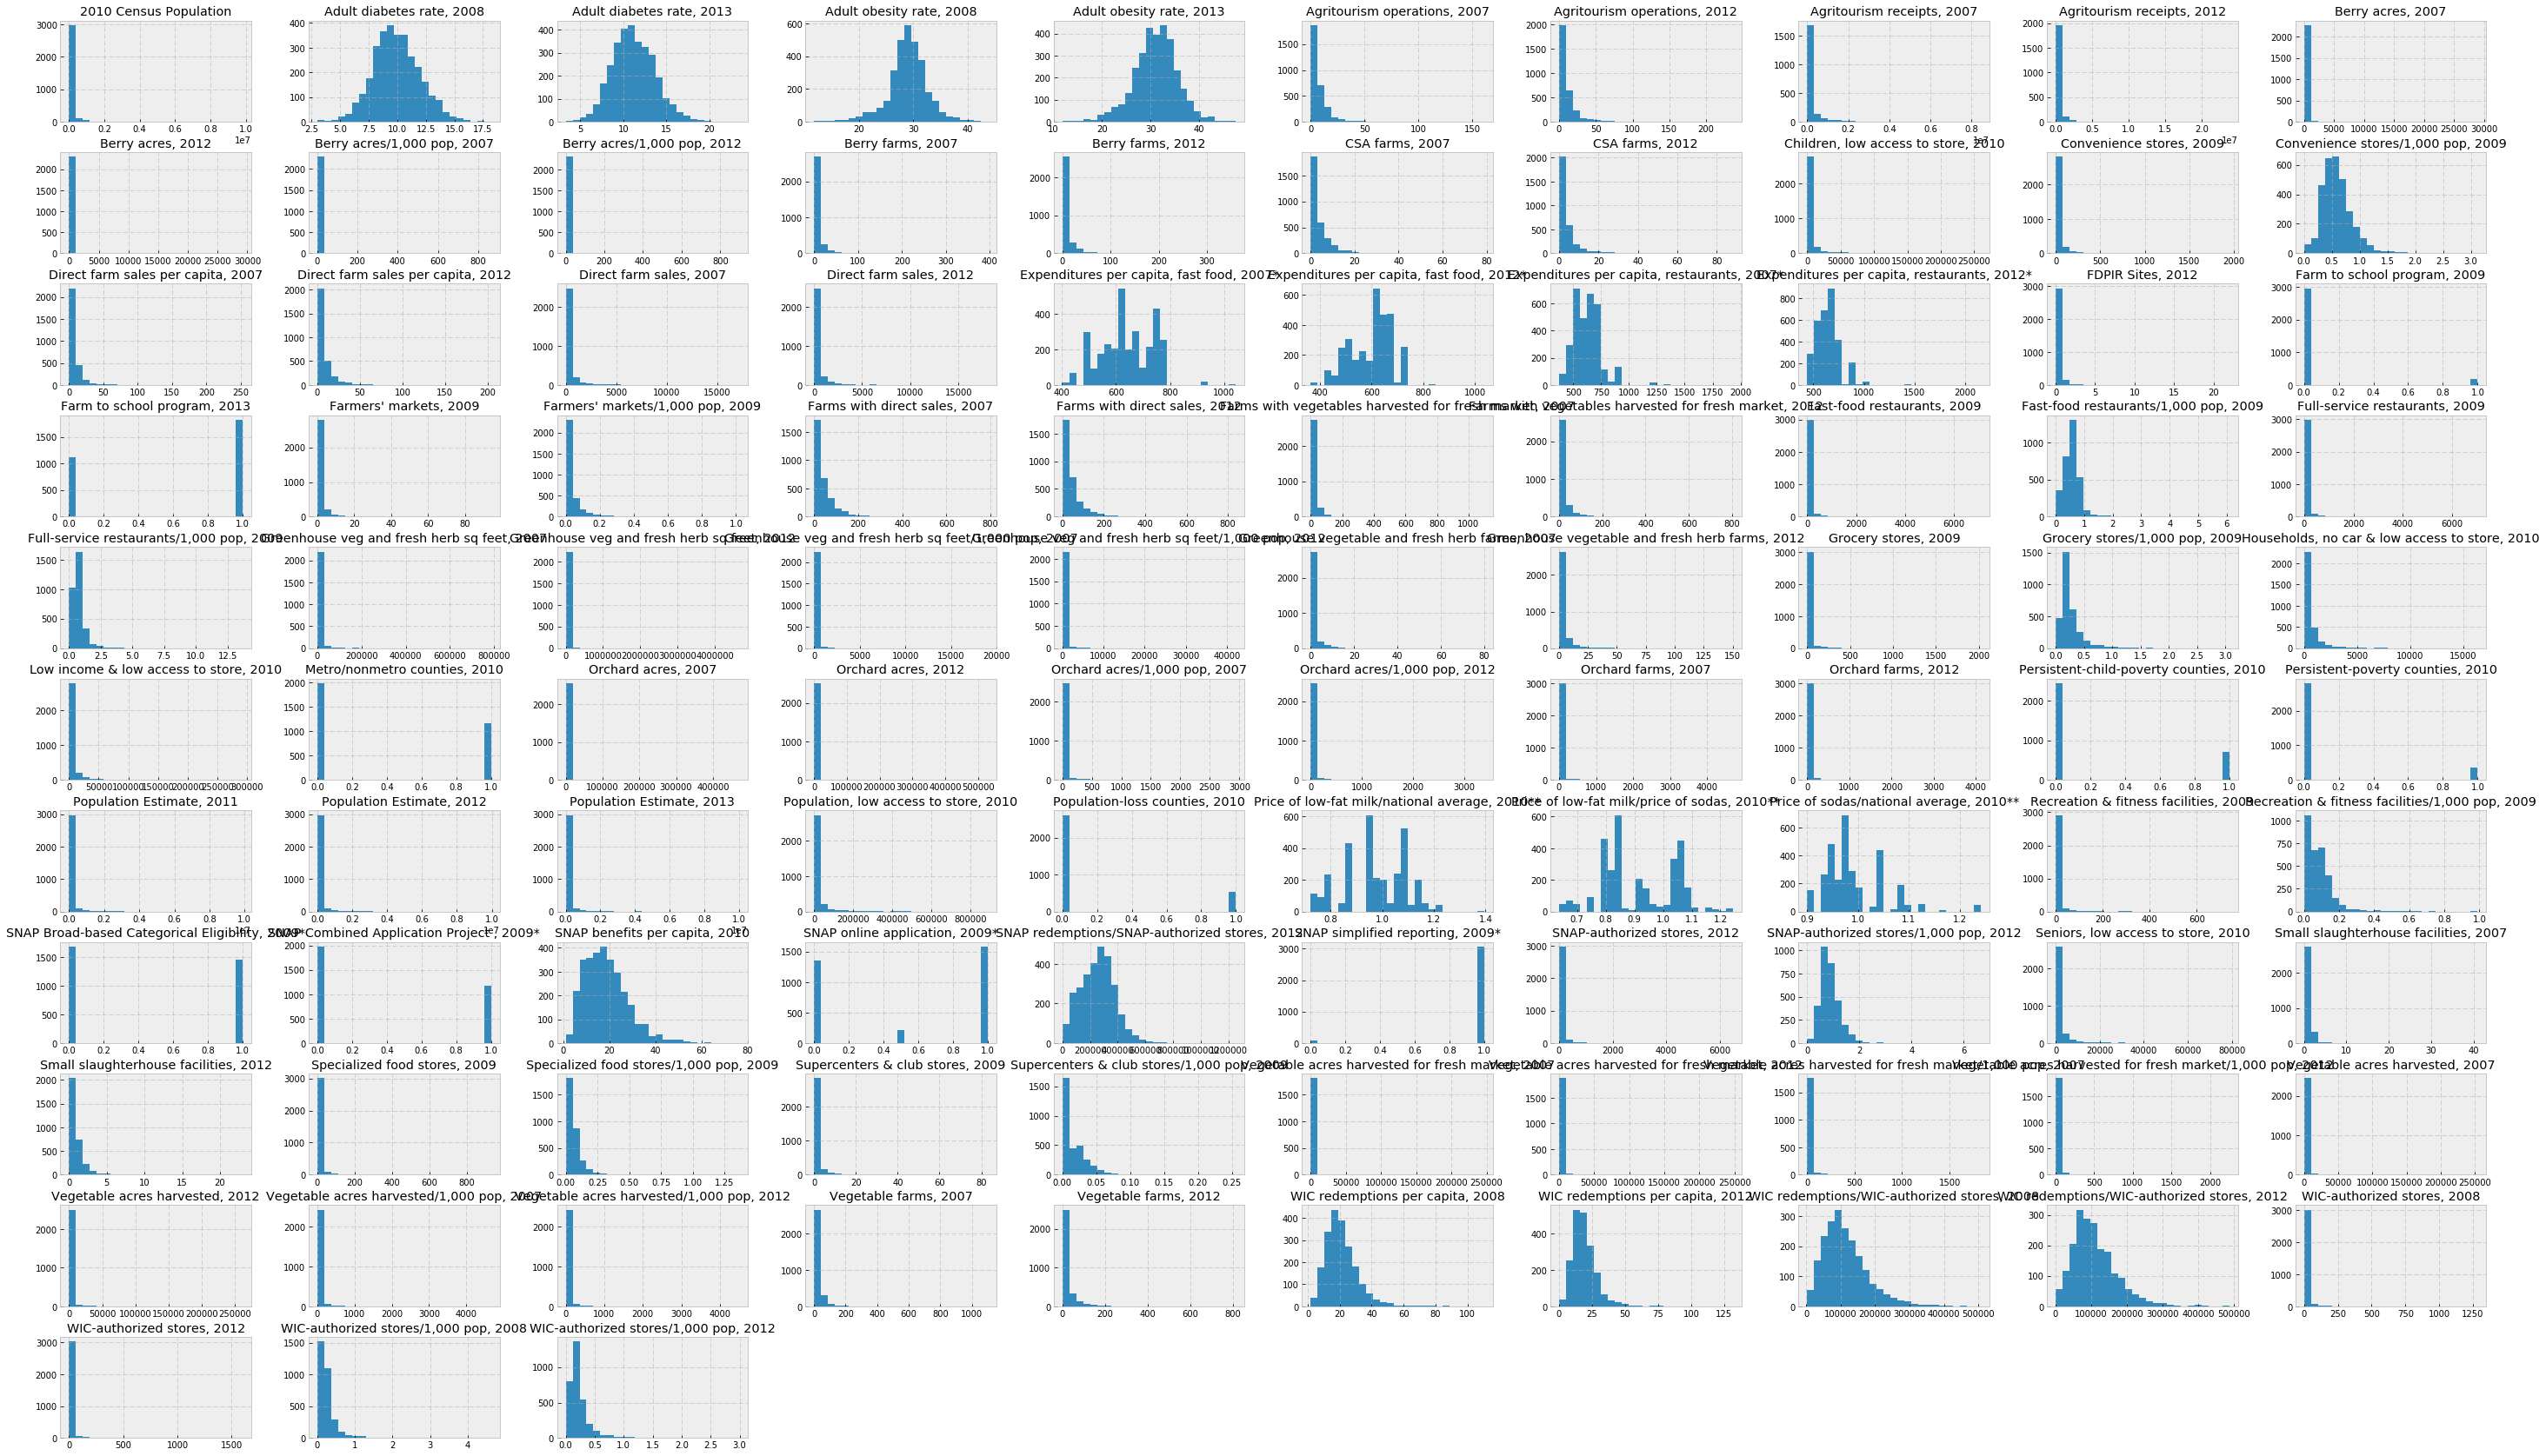

In [21]:
#all together now
fig = df_num.hist(figsize=(50,30), bins=25)
#SOMETIME YOU'LL NEED THE BELOW PIECE OF CODE, SOMETIMES YOU WONT
#IT WILL BE FIXED IN A LATER VERSION OF MATPLOTLIB:
#https://github.com/pandas-dev/pandas/issues/9351
#plt.tight_layout()
#plt.show()

#the above 2 CELLS were for clarity of vision, this one is for ease of calculation
#cut the programmer some slack :p

In [24]:
df_temp1 = df_x[["FIPS","TARGET"]]
df_temp2 = df_x[["FIPS","Grocery stores, 2014"]]

In [25]:
df_temp1

FIPS  TARGET
0      1001       1
1      1003       0
2      1005       0
3      1007       1
4      1009       0
5      1011       0
6      1013       0
7      1015       0
8      1017       0
9      1019       0
10     1021       1
11     1023       1
12     1025       1
13     1027       0
14     1029       1
15     1031       1
16     1033       0
17     1035       1
18     1037       0
19     1039       1
20     1041       1
21     1043       0
22     1045       0
23     1047       1
24     1049       0
25     1051       0
26     1053       1
27     1055       1
28     1057       0
29     1059       0
...     ...     ...
3113  55129       0
3114  55131       0
3115  55133       0
3116  55135       0
3117  55137       0
3118  55139       0
3119  55141       0
3120  56001       0
3121  56003       0
3122  56005       0
3123  56007       1
3124  56009       0
3125  56011       1
3126  56013       1
3127  56015       1
3128  56017       1
3129  56019       0
3130  56021       1
3131  56023       0
3132  56025       1
3133  56027       0
3134  56029       0
3135  56031       0
3136  56033       1
3137  56035       0
3138  56037       0
3139  56039       0
3140  56041       1
3141  56043       1
3142  56045       0

[3143 rows x 2 columns]

In [26]:
df_temp2

FIPS  Grocery stores, 2014
0      1001                     4
1      1003                    29
2      1005                     5
3      1007                     5
4      1009                     6
5      1011                     2
6      1013                     3
7      1015                    27
8      1017                     7
9      1019                     5
10     1021                     6
11     1023                     3
12     1025                     5
13     1027                     3
14     1029                     2
15     1031                     5
16     1033                    10
17     1035                     2
18     1037                     1
19     1039                     6
20     1041                     3
21     1043                    15
22     1045                     8
23     1047                     8
24     1049                    14
25     1051                    10
26     1053                     4
27     1055                    13
28     1057                     5
29     1059                     8
...     ...                   ...
3113  55129                     6
3114  55131                    18
3115  55133                    66
3116  55135                     9
3117  55137                     8
3118  55139                    15
3119  55141                    10
3120  56001                     3
3121  56003                     3
3122  56005                     5
3123  56007                     3
3124  56009                     3
3125  56011                     3
3126  56013                     8
3127  56015                     2
3128  56017                     1
3129  56019                     5
3130  56021                     8
3131  56023                     8
3132  56025                     7
3133  56027                     1
3134  56029                     4
3135  56031                     3
3136  56033                     6
3137  56035                     3
3138  56037                     5
3139  56039                    11
3140  56041                     2
3141  56043                     2
3142  56045                     4

[3143 rows x 2 columns]

In [37]:
#Making "Grocery stores, 2014" the last last column

#gives a list of column headers
#list(df)

#df_target = df["TARGET"]
#df.drop(["TARGET"], axis=1)
#df = df.drop(columns = ["Grocery stores, 2014","TARGET"], axis=1)
#df = pd.merge(df,df_temp,on="FIPS")
list(df)
df1 = df
df2 = df
df1 = df1.drop(columns=["Grocery stores, 2014"], axis=1)
df2 = df2.drop(columns=["TARGET"],axis=1)

In [38]:
#this dataframe has "TARGET" but not "Grocery stores, 2014"
df1

FIPS  Population, low access to store, 2010  \
0     39127                            3713.640840   
1     12035                           33564.747365   
2     16023                             605.164533   
3     12081                           74391.881668   
4     22067                            6896.431864   
5      5031                           24129.965162   
6      1053                            5188.706191   
7     20093                             350.213727   
8     51013                            5136.184060   
9     42007                           67604.925063   
10    19021                            2738.827615   
11    16073                            2056.337099   
12    17197                          242455.252478   
13    54093                              74.186764   
14    22113                            3425.894350   
15    24023                            1294.428666   
16    32007                           11097.091084   
17    40073                            2273.643219   
18    48369                            1384.846203   
19    48311                             692.861567   
20    28045                           19685.624349   
21    19019                            2754.206725   
22     6091                            2855.023103   
23    41067                           70499.471920   
24    13187                             369.651192   
25    27161                            5686.913873   
26     1005                            5722.305602   
27    21111                          131566.316373   
28    48201                          886068.668386   
29    48489                             894.727926   
...     ...                                    ...   
3113  47175                              98.012924   
3114  19111                            4919.817292   
3115  16011                            9351.751607   
3116  31101                            1843.198095   
3117  17185                            1006.757797   
3118  30039                            1957.509309   
3119  50007                           31125.802607   
3120  18069                            7638.158415   
3121  26073                            5721.565859   
3122  38063                            3125.999993   
3123  21027                            1961.618828   
3124  40035                            2597.002975   
3125  31185                            3569.564528   
3126  22015                           29629.757174   
3127  55035                           26548.945007   
3128  18121                            1605.425198   
3129  42089                           50921.538488   
3130  35007                            7046.763464   
3131  21201                            1705.338039   
3132  34013                           68649.951470   
3133  13159                             916.431892   
3134  47075                            3041.491805   
3135   5129                            2725.718432   
3136  37137                             651.566458   
3137  16049                            5583.991627   
3138  12127                          150118.321800   
3139  20161                           35861.649365   
3140  39105                            4990.542475   
3141  39113                          158183.232590   
3142  38055                            4944.006611   

      Low income & low access to store, 2010  \
0                                1898.685754   
1                                9805.739747   
2                                 267.297015   
3                               18524.575189   
4                                3895.543014   
5                                9933.312583   
6                                2903.320779   
7                                 106.814050   
8                                 174.962518   
9                               21133.657431   
10                                789.282204   
11                                835.256118   
12                              39

In [39]:
#this dataframe does not have "TARGET" but does have "Grocery stores, 2014"
df2

FIPS  Population, low access to store, 2010  \
0     39127                            3713.640840   
1     12035                           33564.747365   
2     16023                             605.164533   
3     12081                           74391.881668   
4     22067                            6896.431864   
5      5031                           24129.965162   
6      1053                            5188.706191   
7     20093                             350.213727   
8     51013                            5136.184060   
9     42007                           67604.925063   
10    19021                            2738.827615   
11    16073                            2056.337099   
12    17197                          242455.252478   
13    54093                              74.186764   
14    22113                            3425.894350   
15    24023                            1294.428666   
16    32007                           11097.091084   
17    40073                            2273.643219   
18    48369                            1384.846203   
19    48311                             692.861567   
20    28045                           19685.624349   
21    19019                            2754.206725   
22     6091                            2855.023103   
23    41067                           70499.471920   
24    13187                             369.651192   
25    27161                            5686.913873   
26     1005                            5722.305602   
27    21111                          131566.316373   
28    48201                          886068.668386   
29    48489                             894.727926   
...     ...                                    ...   
3113  47175                              98.012924   
3114  19111                            4919.817292   
3115  16011                            9351.751607   
3116  31101                            1843.198095   
3117  17185                            1006.757797   
3118  30039                            1957.509309   
3119  50007                           31125.802607   
3120  18069                            7638.158415   
3121  26073                            5721.565859   
3122  38063                            3125.999993   
3123  21027                            1961.618828   
3124  40035                            2597.002975   
3125  31185                            3569.564528   
3126  22015                           29629.757174   
3127  55035                           26548.945007   
3128  18121                            1605.425198   
3129  42089                           50921.538488   
3130  35007                            7046.763464   
3131  21201                            1705.338039   
3132  34013                           68649.951470   
3133  13159                             916.431892   
3134  47075                            3041.491805   
3135   5129                            2725.718432   
3136  37137                             651.566458   
3137  16049                            5583.991627   
3138  12127                          150118.321800   
3139  20161                           35861.649365   
3140  39105                            4990.542475   
3141  39113                          158183.232590   
3142  38055                            4944.006611   

      Low income & low access to store, 2010  \
0                                1898.685754   
1                                9805.739747   
2                                 267.297015   
3                               18524.575189   
4                                3895.543014   
5                                9933.312583   
6                                2903.320779   
7                                 106.814050   
8                                 174.962518   
9                               21133.657431   
10                                789.282204   
11                                835.256118   
12                              39

In [41]:
df_num_corr2 = df2.corr()["Grocery stores, 2014"][:-1]
golden_features_list2 = df_num_corr2[abs(df_num_corr) > 0.5].sort_values(ascending = False)
print("There are {} strongly correlated values with number of Grocery Stores\n{}".format(len(golden_features_list2),golden_features_list2))

There are 13 strongly correlated values with number of Grocery Stores
Grocery stores, 2009                     0.992597
Specialized food stores, 2009            0.956298
WIC-authorized stores, 2008              0.941075
WIC-authorized stores, 2012              0.930626
SNAP-authorized stores, 2012             0.910626
2010 Census Population                   0.837746
Population Estimate, 2011                0.837547
Population Estimate, 2012                0.836951
Population Estimate, 2013                0.836167
Convenience stores, 2009                 0.692089
Population, low access to store, 2010    0.539090
Seniors, low access to store, 2010       0.526761
Children, low access to store, 2010      0.524718
Name: Grocery stores, 2014, dtype: float64


In [43]:
df_num_corr1 = df1.corr()["TARGET"][:-1]
golden_features_list1 = df_num_corr1[abs(df_num_corr) > 0.5].sort_values(ascending = False)
print("There are {} strongly correlated values with TARGET\n{}".format(len(golden_features_list1),golden_features_list1))

There are 13 strongly correlated values with TARGET
Convenience stores, 2009                -0.036084
Seniors, low access to store, 2010      -0.039372
SNAP-authorized stores, 2012            -0.044678
WIC-authorized stores, 2008             -0.045842
Grocery stores, 2009                    -0.048083
WIC-authorized stores, 2012             -0.051664
Population, low access to store, 2010   -0.053435
2010 Census Population                  -0.054751
Population Estimate, 2011               -0.055294
Population Estimate, 2012               -0.055649
Children, low access to store, 2010     -0.055775
Population Estimate, 2013               -0.055983
Specialized food stores, 2009           -0.063344
Name: TARGET, dtype: float64


C:\anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


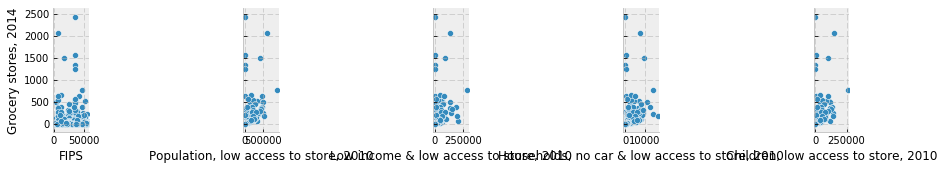

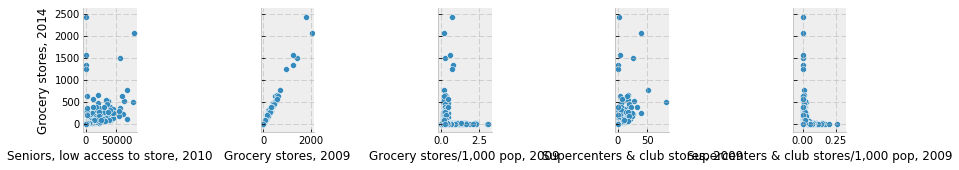

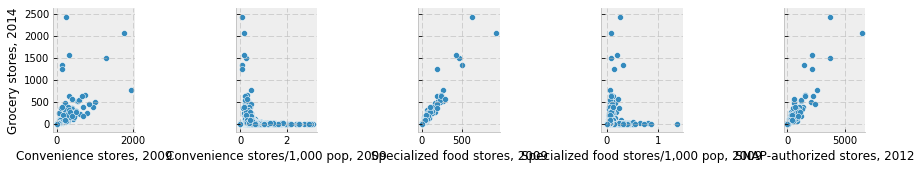

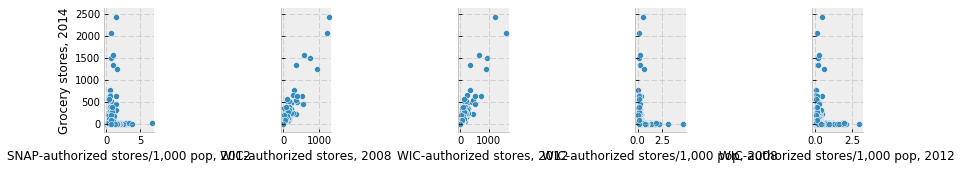

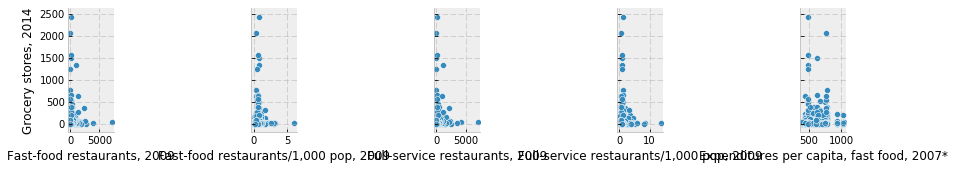

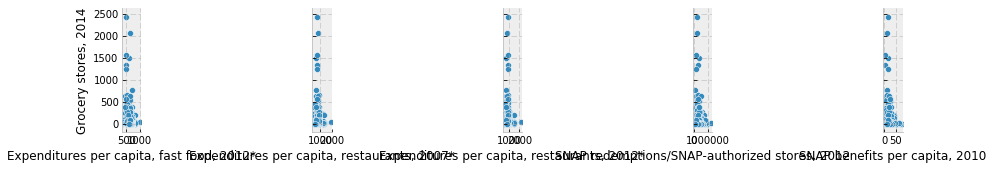

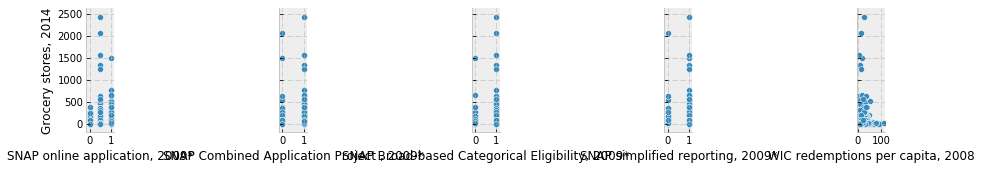

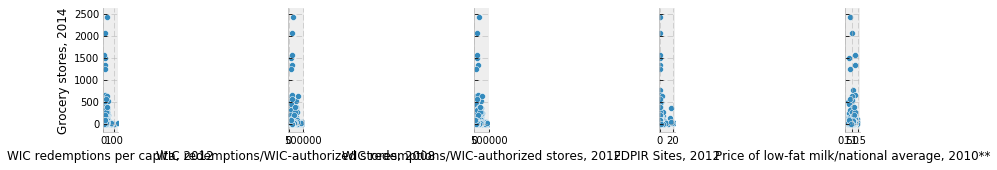

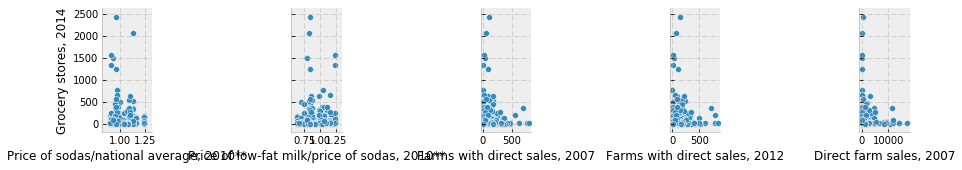

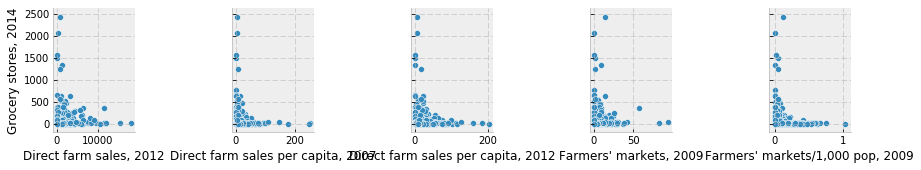

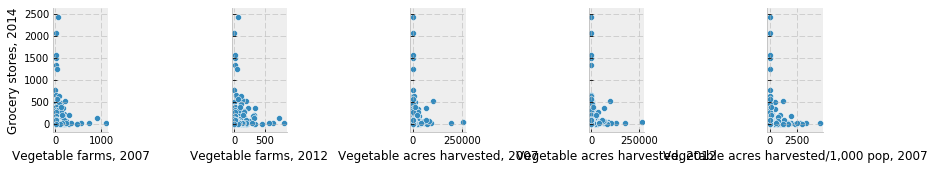

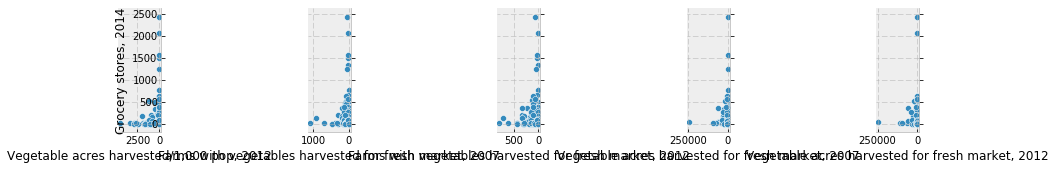

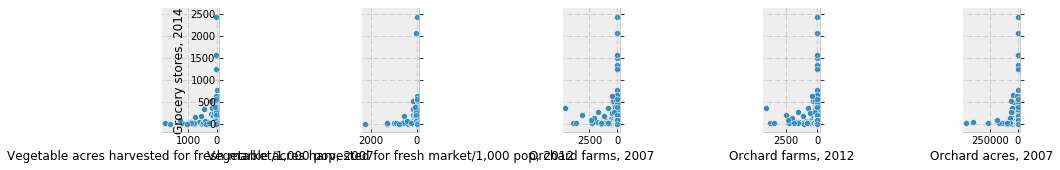

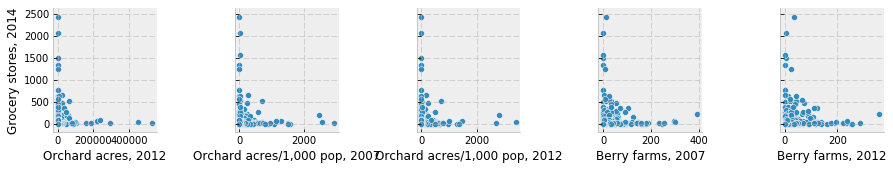

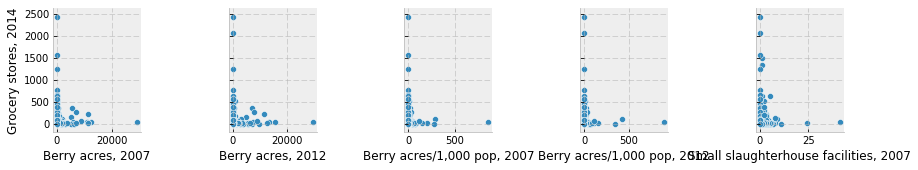

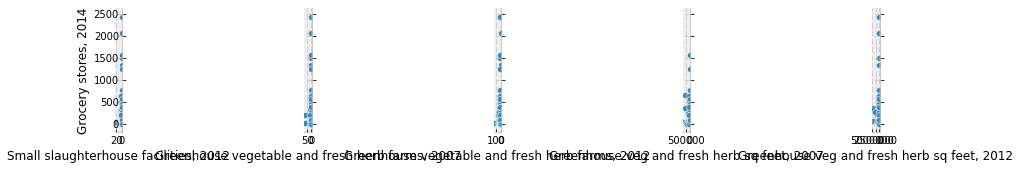

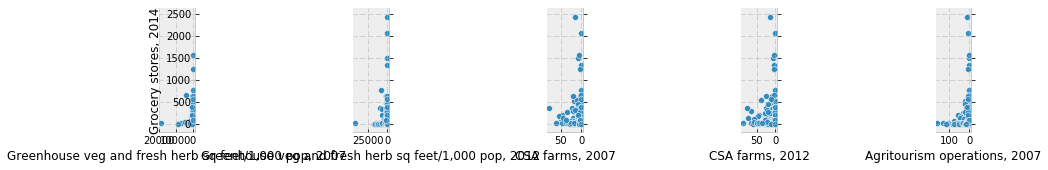

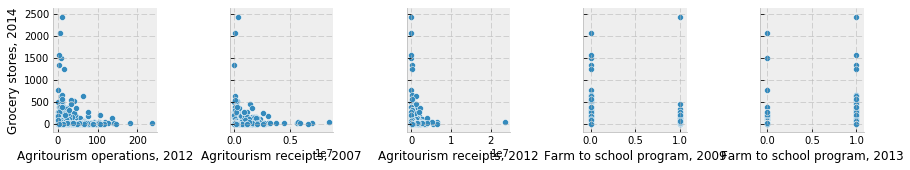

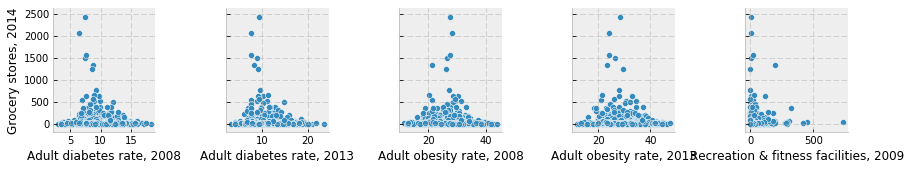

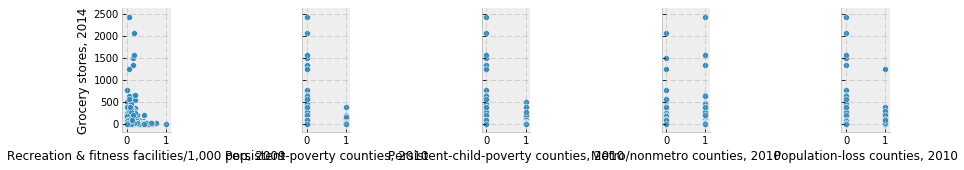

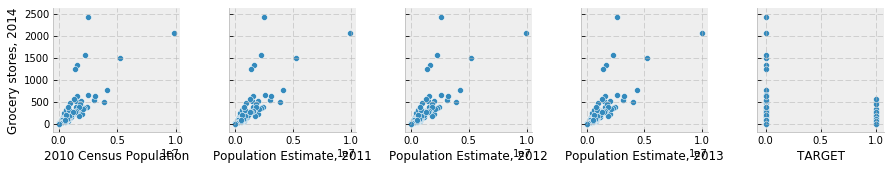

In [44]:
#we have a list of strongly correlated values, might be skewed by outliers.
#we can plot the features to confirm and check for outliers
#remove outliers and check correlation again
plt.close()
for i in range(0, len(df_num.columns), 5):
        plt.figure(figsize=(40,50))
        sns.pairplot(data = df,
                x_vars = df.columns[i:i+5],
                y_vars = ['Grocery stores, 2014'])
        #plt.tight_layout
        #plt.show()

In [48]:
plt.close()
#WE NEED TO FIGURE OUT HOW TO GET THESE IMAGES ALIGNED BEAUTIFULLY!BUT ONTO MORE PRESSING THINGS!
#lot of data points are on x=0, so we account for that:
print("This is for 'Grocery Stores, 2014'\n")
import operator

individual_features_df2 = []
for i in range(0,len(df2.columns)-1):
    tmpDf2 = df2[[df2.columns[i],'Grocery stores, 2014']]
    tmpDf2 = tmpDf2[tmpDf2[df2.columns[i]] != 0]
    individual_features_df2.append(tmpDf2)
    
all_correlations2 = {feature.columns[0]: feature.corr()["Grocery stores, 2014"][0] for feature in individual_features_df2}
all_correlations2 = sorted(all_correlations2.items(), key = operator.itemgetter(1))
for (key,value) in all_correlations2:
    print("{:>15}: {:>15}".format(key,value))

print("Well, that was a nice wall of text, lets get something nice out of it, shall we? \n")


This is for 'Grocery Stores, 2014'

Supercenters & club stores/1,000 pop, 2009: -0.22956962757221008
SNAP online application, 2009*: -0.19393220520650897
Convenience stores/1,000 pop, 2009: -0.18593297531712727
Expenditures per capita, fast food, 2012*: -0.08060895094272258
WIC-authorized stores/1,000 pop, 2008: -0.07540802263810657
WIC-authorized stores/1,000 pop, 2012: -0.06042190886266013
SNAP-authorized stores/1,000 pop, 2012: -0.05808689413037021
Farmers' markets/1,000 pop, 2009: -0.054968251021237605
SNAP benefits per capita, 2010: -0.041291825662398335
           FIPS: -0.03620369786486665
WIC redemptions per capita, 2008: -0.03264566775617496
Expenditures per capita, fast food, 2007*: -0.024415400370163903
WIC redemptions per capita, 2012: -0.019827683137231607
Direct farm sales per capita, 2007: -0.003975481023676604
Grocery stores/1,000 pop, 2009: 0.0005144871099515128
SNAP redemptions/SNAP-authorized stores, 2012: 0.005709627087076315
WIC redemptions/WIC-authorized stores, 2

In [57]:
golden_features_list2 = [key for key, value in all_correlations2 if abs(value) >= 0.5]
print("There are {} strongly correlated calues with number of Grocery Stores in 2014:\n{}".format(len(golden_features_list2), golden_features_list2))
print("\nA better version: \n")
counter = 0
for (key,value) in all_correlations2:
    if abs(value) > 0.5 :
        counter = counter + 1
        print("{:>15}: {:>15}".format(key,value))
print("\nNumber of strongly correlated features is: {}".format(counter))

There are 14 strongly correlated calues with number of Grocery Stores in 2014:
['Supercenters & club stores, 2009', 'Population, low access to store, 2010', 'Children, low access to store, 2010', 'Seniors, low access to store, 2010', 'Convenience stores, 2009', 'SNAP-authorized stores, 2012', 'WIC-authorized stores, 2012', 'WIC-authorized stores, 2008', 'Specialized food stores, 2009', 'Grocery stores, 2009', 'Population Estimate, 2013', 'Population Estimate, 2012', 'Population Estimate, 2011', '2010 Census Population']

A better version: 

Supercenters & club stores, 2009: 0.5068005905189055
Population, low access to store, 2010: 0.538919242345071
Children, low access to store, 2010: 0.5451519497822308
Seniors, low access to store, 2010: 0.5474637656028338
Convenience stores, 2009: 0.691878236256549
SNAP-authorized stores, 2012: 0.9106076630127427
WIC-authorized stores, 2012: 0.9306393182413071
WIC-authorized stores, 2008: 0.9413218438166796
Specialized food stores, 2009: 0.9557645999

In [54]:
#plt.close()
#WE NEED TO FIGURE OUT HOW TO GET THESE IMAGES ALIGNED BEAUTIFULLY!BUT ONTO MORE PRESSING THINGS!
#lot of data points are on x=0, so we account for that:
#this is for TARGET

individual_features_df1 = []
for i in range(0,len(df1.columns)-1):
    tmpDf1 = df1[[df1.columns[i],'TARGET']]
    tmpDf1 = tmpDf1[tmpDf1[df1.columns[i]] != 0]
    individual_features_df1.append(tmpDf1)
    
all_correlations1 = {feature.columns[0]: feature.corr()["TARGET"][0] for feature in individual_features_df1}
all_correlations1 = sorted(all_correlations1.items(), key = operator.itemgetter(1))
for (key,value) in all_correlations1:
    print("{:>15}: {:>15}".format(key,value))


Specialized food stores, 2009: -0.09799967694175532
Price of sodas/national average, 2010**: -0.09392935674115707
Supercenters & club stores, 2009: -0.08600388198709731
Specialized food stores/1,000 pop, 2009: -0.07607927515702524
Full-service restaurants/1,000 pop, 2009: -0.06268646854076157
WIC-authorized stores/1,000 pop, 2012: -0.060563643112091343
Children, low access to store, 2010: -0.05645391994576251
WIC-authorized stores, 2012: -0.05504106484100898
Population, low access to store, 2010: -0.05355756933272612
Grocery stores, 2009: -0.05263772236751445
WIC-authorized stores/1,000 pop, 2008: -0.05261032663918584
WIC-authorized stores, 2008: -0.04881092476399066
SNAP-authorized stores, 2012: -0.04649054440400521
Convenience stores, 2009: -0.04007703527519285
Seniors, low access to store, 2010: -0.039877424896149795
Convenience stores/1,000 pop, 2009: -0.03662588430804086
Direct farm sales, 2007: -0.034398895062114826
Low income & low access to store, 2010: -0.034075770503343275
Di

In [59]:
golden_features_list1 = [key for key, value in all_correlations1 if abs(value) >= 0.5]
print("There are {} strongly correlated calues with TARGET:\n{}".format(len(golden_features_list1), golden_features_list1))
print("\nA better version: \n")
counter = 0
for (key,value) in all_correlations1:
    if abs(value) > 0.5 :
        counter = counter + 1
        print("{:>15}: {:>15}".format(key,value))
print("\nNumber of strongly correlated features is: {}".format(counter))

There are 0 strongly correlated calues with TARGET:
[]

A better version: 


Number of strongly correlated features is: 0


In [24]:
#will display useful inputs about matplotplib
?%matplotlib

In [60]:
#correlation between variables
#the plot will take a while.
#WE NEED A FIGURE WINDOW TO OPEN FOR THIS.MOVING ON.
plt.close()
#%matplotlib nbagg
corr = df2.drop("Grocery stores, 2014", axis=1).corr()
plt.figure(figsize=(300,300))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap = 'viridis', vmax = 1.0, vmin = -1.0, linewidths = 0.1,
            annot = True, annot_kws={"size":8}, square=True)

In [63]:
writer = pd.ExcelWriter(r'C:\ML Hackathon\reduced_features_data.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
writer.save()

In [65]:
quantitative_features_list = ["FIPS",
"Population, low access to store, 2010",
"Low income & low access to store, 2010",
"Households, no car & low access to store, 2010",
"Children, low access to store, 2010",
"Seniors, low access to store, 2010",
"Grocery stores, 2009",
"Grocery stores/1,000 pop, 2009",
"Supercenters & club stores, 2009",
"Supercenters & club stores/1,000 pop, 2009",
"Convenience stores, 2009",
"Convenience stores/1,000 pop, 2009",
"Specialized food stores, 2009",
"Specialized food stores/1,000 pop, 2009",
"SNAP-authorized stores, 2012",
"SNAP-authorized stores/1,000 pop, 2012",
"WIC-authorized stores, 2008",
"WIC-authorized stores, 2012",
"WIC-authorized stores/1,000 pop, 2008",
"WIC-authorized stores/1,000 pop, 2012",
"Fast-food restaurants, 2009",
"Fast-food restaurants/1,000 pop, 2009",
"Full-service restaurants, 2009",
"Full-service restaurants/1,000 pop, 2009",
"Expenditures per capita, fast food, 2007*",
"Expenditures per capita, fast food, 2012*",
"Expenditures per capita, restaurants, 2007*",
"Expenditures per capita, restaurants, 2012*",
"SNAP redemptions/SNAP-authorized stores, 2012",
"SNAP benefits per capita, 2010",
"WIC redemptions per capita, 2008",
"WIC redemptions per capita, 2012",
"WIC redemptions/WIC-authorized stores, 2008",
"WIC redemptions/WIC-authorized stores, 2012",
"FDPIR Sites, 2012",
"Price of low-fat milk/national average, 2010**",
"Price of sodas/national average, 2010**",
"Price of low-fat milk/price of sodas, 2010**",
"Farms with direct sales, 2007",
"Farms with direct sales, 2012",
"Direct farm sales, 2007",
"Direct farm sales, 2012",
"Direct farm sales per capita, 2007",
"Direct farm sales per capita, 2012",
"Farmers' markets, 2009",
"Farmers' markets/1,000 pop, 2009",
"Vegetable farms, 2007",
"Vegetable farms, 2012",
"Vegetable acres harvested, 2007",
"Vegetable acres harvested, 2012",
"Vegetable acres harvested/1,000 pop, 2007",
"Vegetable acres harvested/1,000 pop, 2012",
"Farms with vegetables harvested for fresh market, 2007",
"Farms with vegetables harvested for fresh market, 2012",
"Vegetable acres harvested for fresh market, 2007",
"Vegetable acres harvested for fresh market, 2012",
"Vegetable acres harvested for fresh market/1,000 pop, 2007",
"Vegetable acres harvested for fresh market/1,000 pop, 2012",
"Orchard farms, 2007",
"Orchard farms, 2012",
"Orchard acres, 2007",
"Orchard acres, 2012",
"Orchard acres/1,000 pop, 2007",
"Orchard acres/1,000 pop, 2012",
"Berry farms, 2007",
"Berry farms, 2012",
"Berry acres, 2007",
"Berry acres, 2012",
"Berry acres/1,000 pop, 2007",
"Berry acres/1,000 pop, 2012",
"Small slaughterhouse facilities, 2007",
"Small slaughterhouse facilities, 2012",
"Greenhouse vegetable and fresh herb farms, 2007",
"Greenhouse vegetable and fresh herb farms, 2012",
"Greenhouse veg and fresh herb sq feet, 2007",
"Greenhouse veg and fresh herb sq feet, 2012",
"Greenhouse veg and fresh herb sq feet/1,000 pop, 2007",
"Greenhouse veg and fresh herb sq feet/1,000 pop, 2012",
"CSA farms, 2007",
"CSA farms, 2012",
"Agritourism operations, 2007",
"Agritourism operations, 2012",
"Agritourism receipts, 2007",
"Agritourism receipts, 2012",
"Adult diabetes rate, 2008",
"Adult diabetes rate, 2013",
"Adult obesity rate, 2008",
"Adult obesity rate, 2013",
"Recreation & fitness facilities, 2009",
"Recreation & fitness facilities/1,000 pop, 2009",
"2010 Census Population",
"Population Estimate, 2011",
"Population Estimate, 2012",
"Population Estimate, 2013"]
len(quantitative_features_list)

94

In [67]:
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

FIPS  Population, low access to store, 2010  \
0  39127                            3713.640840   
1  12035                           33564.747365   
2  16023                             605.164533   
3  12081                           74391.881668   
4  22067                            6896.431864   

   Low income & low access to store, 2010  \
0                             1898.685754   
1                             9805.739747   
2                              267.297015   
3                            18524.575189   
4                             3895.543014   

   Households, no car & low access to store, 2010  \
0                                      790.543946   
1                                      861.286373   
2                                        6.680208   
3                                     1306.101746   
4                                      687.008404   

   Children, low access to store, 2010  Seniors, low access to store, 2010  \
0                          1094.142002                          456.217887   
1                          6983.983143                         8236.167390   
2                           199.206240                           74.483135   
3                         12245.034104                        21417.001485   
4                          1723.974298                         1035.606703   

   Grocery stores, 2009  Grocery stores/1,000 pop, 2009  \
0                     8                        0.222247   
1                    14                        0.147835   
2                     1                        0.352734   
3                    60                        0.187084   
4                     4                        0.142111   

   Supercenters & club stores, 2009  \
0                                 0   
1                                 1   
2                                 0   
3                                 7   
4                                 1   

   Supercenters & club stores/1,000 pop, 2009            ...              \
0                                    0.000000            ...               
1                                    0.010560            ...               
2                                    0.000000            ...               
3                                    0.021826            ...               
4                                    0.035528            ...               

   Adult diabetes rate, 2008  Adult diabetes rate, 2013  \
0                       10.8                       12.4   
1                       11.0                       12.4   
2                        8.1                       11.0   
3                       12.0                       15.6   
4                       12.8                       11.1   

   Adult obesity rate, 2008  Adult obesity rate, 2013  \
0                      29.9                      29.9   
1                      28.5                      28.9   
2                      25.2                      27.3   
3                      32.0                      34.1   
4                      34.6                      41.8   

   Recreation & fitness facilities, 2009  \
0                                      2   
1                                     22   
2                                      3   
3                                      4   
4                                      0   

   Recreation & fitness facilities/1,000 pop, 2009  2010 Census Population  \
0                                         0.101735                   36058   
1                                         0.074070                   95696   
2                                         0.277290                    2891   
3                                         0.206943                  322833   
4                                         0.000000                   27979   

   Population Estimate, 2011  Population Estimate, 2012  \
0                      36207                      35991   
1                      97412             

In [68]:
#trimming down on number of features
#FIPS will get trimmed here for example, it aint really a feature per se
features_to_analyse2 = [x for x in quantitative_features_list if x in golden_features_list2]
features_to_analyse2.append('Grocery stores, 2014')
features_to_analyse2

['Population, low access to store, 2010',
 'Children, low access to store, 2010',
 'Seniors, low access to store, 2010',
 'Grocery stores, 2009',
 'Supercenters & club stores, 2009',
 'Convenience stores, 2009',
 'Specialized food stores, 2009',
 'SNAP-authorized stores, 2012',
 'WIC-authorized stores, 2008',
 'WIC-authorized stores, 2012',
 '2010 Census Population',
 'Population Estimate, 2011',
 'Population Estimate, 2012',
 'Population Estimate, 2013',
 'Grocery stores, 2014']

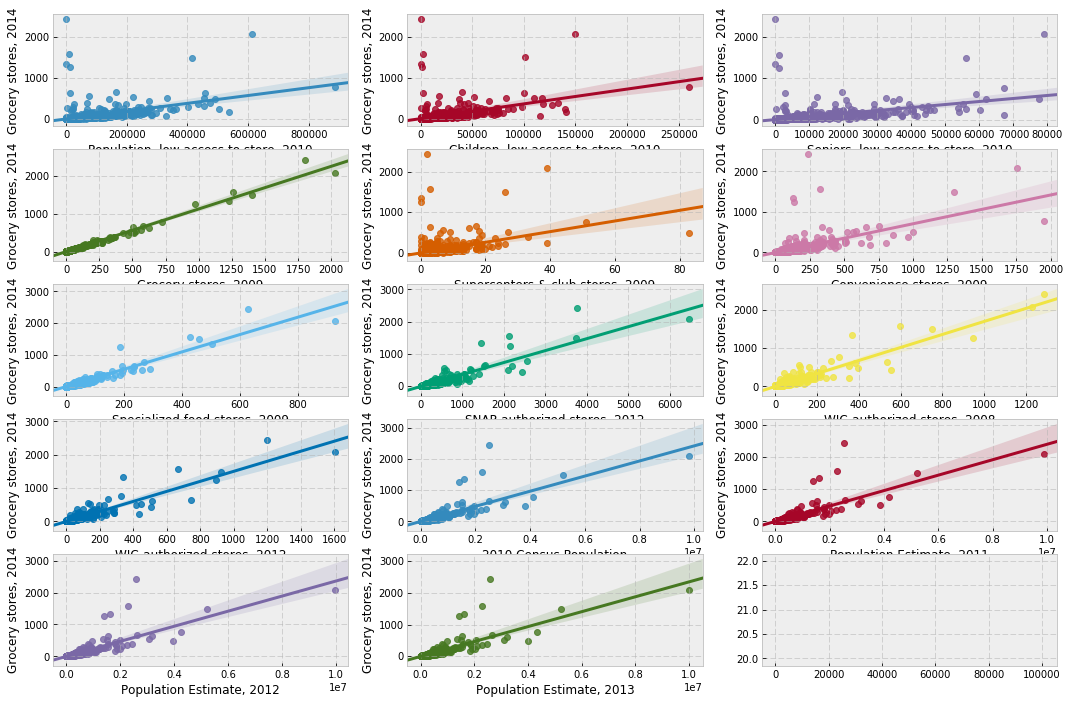

In [69]:
fig, ax = plt.subplots(round(len(features_to_analyse2) / 3), 3, figsize = (18,12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse2) - 1:
        sns.regplot(x=features_to_analyse2[i],y="Grocery stores, 2014", data=df[features_to_analyse2], ax=ax)

In [71]:
categorical_features_list = ["SNAP online application, 2009*",
"SNAP Combined Application Project , 2009*",
"SNAP Broad-based Categorical Eligibility, 2009*",
"SNAP simplified reporting, 2009*",
"Farm to school program, 2009",
"Farm to school program, 2013",
"Persistent-poverty counties, 2010",
"Persistent-child-poverty counties, 2010",
"Metro/nonmetro counties, 2010",
"Population-loss counties, 2010"]
df_categ = df[categorical_features]
df_categ.head()

SNAP online application, 2009*  SNAP Combined Application Project , 2009*  \
0                             0.0                                          0   
1                             1.0                                          1   
2                             0.0                                          0   
3                             1.0                                          1   
4                             0.0                                          1   

   SNAP Broad-based Categorical Eligibility, 2009*  \
0                                                1   
1                                                0   
2                                                1   
3                                                0   
4                                                0   

   SNAP simplified reporting, 2009*  Farm to school program, 2009  \
0                                 1                           0.0   
1                                 1                           1.0   
2                                 1                           0.0   
3                                 1                           0.0   
4                                 1                           0.0   

   Farm to school program, 2013  Persistent-poverty counties, 2010  \
0                           1.0                                  0   
1                           1.0                                  0   
2                           1.0                                  0   
3                           1.0                                  1   
4                           0.0                                  1   

   Persistent-child-poverty counties, 2010  Metro/nonmetro counties, 2010  \
0                                        0                              0   
1                                        1                              1   
2                                        0                              0   
3                                        1                              0   
4                                        1                              0   

   Population-loss counties, 2010  
0                             1.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0